In [56]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd
import cv2
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Load Data 

In [261]:
# Define the file path to folders of apple vairieties.
DataDir = 'C:\\Users\\User\\Documents\\Future\\DATA Science\\Data Science Projects\\Apple Variety'
Categories = ['braeburn','bramley','cox','gala','russet'] #Define Category names (names of the folders)

for category in Categories:
    path = os.path.join(DataDir,category) #path to different categories
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        
    

In [4]:
img_array.shape

(100, 100, 3)

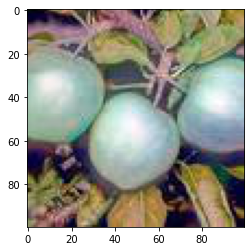

In [224]:
#Choose image size
IMG_SIZE = 100

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array)

In [262]:
#Create empty training dataset
training_data = []

#Create function that fetches all teh images from the different folders and append the associated label (folder name)
def create_training_data():
    for category in Categories:
        path = os.path.join(DataDir, category) #path to different categories
        label = category
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,label])
        
        
  

In [263]:
#Apply function
create_training_data()

In [8]:
print(len(training_data))

804


In [264]:
#Shuffle data
import random

random.shuffle(training_data)

In [265]:
#Create  empty X and y lists to fill
X=[]
y=[]

In [266]:
#Create loop appending image array(features) to X and labels to y
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)

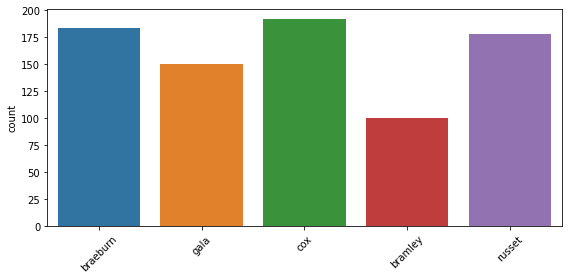

In [13]:
#Check counts of the categories
plt.figure(figsize=(8,4))
chart = sns.countplot(y)
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
plt.tight_layout()

In [267]:
#Normalize image data by dividing by the max RGB value

X = X/255

In [217]:
X.shape

(804, 100, 100, 3)

In [268]:
#Convert label values to numbers to allow keras to process them
y_df = pd.DataFrame(y)
y1 = y_df[0].map({'braeburn':0,'bramley':1,'cox':2,'gala':3,'russet':4})


In [269]:
y = np.array(y1)
y

array([0, 1, 4, 1, 4, 1, 4, 4, 3, 2, 2, 4, 4, 4, 2, 1, 2, 4, 0, 0, 2, 1,
       4, 3, 0, 3, 4, 2, 0, 2, 3, 0, 4, 0, 2, 3, 2, 2, 3, 4, 4, 1, 4, 2,
       2, 1, 2, 2, 0, 3, 3, 2, 4, 2, 0, 0, 2, 0, 4, 3, 3, 4, 4, 0, 0, 3,
       2, 3, 4, 4, 3, 1, 4, 3, 2, 3, 4, 4, 4, 4, 2, 4, 2, 0, 0, 3, 4, 2,
       3, 2, 4, 3, 1, 2, 0, 4, 2, 0, 4, 4, 1, 2, 3, 4, 0, 3, 1, 3, 1, 4,
       3, 2, 3, 2, 3, 2, 3, 0, 4, 1, 2, 2, 2, 0, 3, 1, 4, 0, 3, 2, 3, 0,
       0, 1, 4, 2, 4, 2, 0, 4, 4, 4, 1, 1, 3, 4, 2, 4, 4, 1, 3, 1, 0, 1,
       1, 2, 4, 4, 2, 4, 3, 4, 2, 0, 3, 2, 3, 0, 4, 0, 2, 0, 4, 0, 2, 1,
       2, 3, 2, 3, 2, 2, 3, 4, 1, 2, 1, 3, 2, 0, 2, 3, 2, 2, 4, 1, 1, 0,
       2, 4, 2, 4, 2, 4, 4, 2, 0, 4, 2, 3, 0, 3, 1, 0, 1, 2, 3, 0, 4, 2,
       3, 4, 0, 1, 4, 1, 3, 2, 1, 0, 0, 1, 1, 1, 0, 4, 3, 3, 2, 1, 2, 1,
       0, 4, 0, 4, 3, 3, 0, 0, 3, 4, 4, 3, 0, 2, 0, 1, 4, 2, 1, 0, 1, 0,
       4, 0, 0, 1, 3, 2, 2, 0, 2, 3, 1, 3, 2, 4, 0, 4, 2, 3, 4, 2, 0, 2,
       0, 4, 4, 1, 0, 1, 2, 1, 2, 3, 2, 2, 1, 3, 3,

In [18]:
from sklearn.model_selection import train_test_split

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [71]:
X_train.shape

(538, 100, 100, 3)

In [247]:
#Define number of classes
num_classes = 5

**Create class weights to compensate for different class sizes**

In [ ]:
from sklearn.utils import class_weight

In [272]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

## Baseline model

In [196]:
model1 = Sequential()

model1.add(Conv2D(16, 3,padding='same',input_shape = (100,100,3)))
model1.add(Activation("relu"))
model1.add(MaxPooling2D())

model1.add(Conv2D(32, (3,3)))
model1.add(Activation("relu"))
model1.add(MaxPooling2D()) 

model1.add(Conv2D(64, (3,3)))
model1.add(Activation("relu"))
model1.add(MaxPooling2D())  


model1.add(Flatten())
model1.add(Dense(128))

          
model1.add(Dense(num_classes,activation='softmax'))
          
model1.compile(loss= 'sparse_categorical_crossentropy',optimizer="adam",metrics=["accuracy"])
          

In [241]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 100, 100, 16)      448       
_________________________________________________________________
activation_61 (Activation)   (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 48, 48, 32)        4640      
_________________________________________________________________
activation_62 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 22, 22, 64)        18496     
__________

In [197]:
model1.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=32,
          validation_data=(X_test, y_test), 
          class_weight=class_weights)

Train on 538 samples, validate on 266 samples
Epoch 1/25
538/538 [==============================] - 10s 18ms/sample - loss: 1.6375 - acc: 0.2862 - val_loss: 1.2278 - val_acc: 0.4812
Epoch 2/25
538/538 [==============================] - 9s 17ms/sample - loss: 1.1465 - acc: 0.4963 - val_loss: 1.1532 - val_acc: 0.4624
Epoch 3/25
538/538 [==============================] - 11s 21ms/sample - loss: 1.0857 - acc: 0.5725 - val_loss: 1.1574 - val_acc: 0.4925
Epoch 4/25
538/538 [==============================] - 11s 21ms/sample - loss: 0.9858 - acc: 0.5799 - val_loss: 1.1107 - val_acc: 0.5789
Epoch 5/25
538/538 [==============================] - 11s 20ms/sample - loss: 0.8908 - acc: 0.6450 - val_loss: 1.0828 - val_acc: 0.5564
Epoch 6/25
538/538 [==============================] - 12s 22ms/sample - loss: 0.7664 - acc: 0.7249 - val_loss: 1.0727 - val_acc: 0.5789
Epoch 7/25
538/538 [==============================] - 11s 21ms/sample - loss: 0.6732 - acc: 0.7807 - val_loss: 1.0065 - val_acc: 0.5639
Epo

In [199]:
losses = pd.DataFrame(model1.history.history)

<AxesSubplot:>

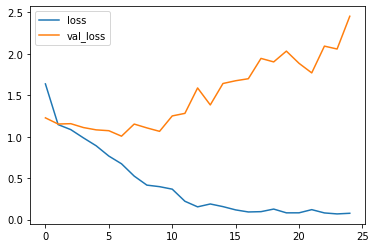

In [200]:
losses[['loss','val_loss']].plot()

**Clear signs of overtraining** 

## Dealing with Overtraining

**Start by introducing an early stop to prevent val_loss from rising**

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [250]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [296]:
model2 = Sequential()

model2.add(Conv2D(16, 3,padding='same',input_shape = (100,100,3)))
model2.add(Activation("relu"))
model2.add(MaxPooling2D())


model2.add(Conv2D(32, 3,padding='same'))
model2.add(Activation("relu"))
model2.add(MaxPooling2D())


model2.add(Conv2D(64, 3,padding='same'))
model2.add(Activation("relu"))
model2.add(MaxPooling2D())



model2.add(Flatten())
model2.add(Dense(128))


          
model2.add(Dense(num_classes,activation='softmax'))
          
model2.compile(loss= 'sparse_categorical_crossentropy',optimizer="adam",metrics=["accuracy"])
          

In [297]:
model2.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          batch_size=12,
          validation_data=(X_test, y_test), 
         callbacks=[early_stop])

Train on 538 samples, validate on 266 samples
Epoch 1/100
538/538 [==============================] - 15s 28ms/sample - loss: 1.6236 - acc: 0.2955 - val_loss: 1.2898 - val_acc: 0.4286
Epoch 2/100
538/538 [==============================] - 13s 24ms/sample - loss: 1.1808 - acc: 0.5130 - val_loss: 1.0986 - val_acc: 0.5226
Epoch 3/100
538/538 [==============================] - 13s 24ms/sample - loss: 1.0256 - acc: 0.5688 - val_loss: 1.0207 - val_acc: 0.4962
Epoch 4/100
538/538 [==============================] - 13s 24ms/sample - loss: 0.8672 - acc: 0.6617 - val_loss: 0.9502 - val_acc: 0.5827
Epoch 5/100
538/538 [==============================] - 13s 24ms/sample - loss: 0.7601 - acc: 0.7249 - val_loss: 0.9739 - val_acc: 0.5526
Epoch 6/100
538/538 [==============================] - 13s 24ms/sample - loss: 0.6441 - acc: 0.7621 - val_loss: 0.9985 - val_acc: 0.6128
Epoch 7/100
538/538 [==============================] - 13s 25ms/sample - loss: 0.4761 - acc: 0.8309 - val_loss: 1.0039 - val_acc: 0.

In [298]:
losses2 = pd.DataFrame(model2.history.history)

<AxesSubplot:>

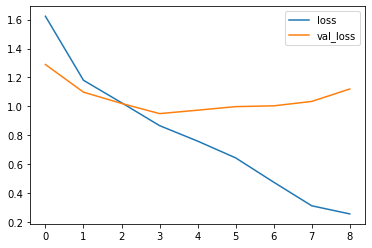

In [299]:
losses2[['loss','val_loss']].plot()

**Val_loss doesnt rise too much but a large difference between loss and val_loss emerges showing overfitting**

In [292]:
from sklearn.metrics import classification_report, confusion_matrix

In [303]:
pred2 = model2.predict_classes(X_test)
pred2

array([2, 4, 4, 4, 1, 0, 0, 0, 4, 1, 0, 3, 4, 2, 3, 4, 3, 4, 2, 2, 4, 3,
       4, 0, 4, 3, 4, 4, 2, 4, 2, 2, 0, 1, 3, 3, 1, 0, 0, 4, 0, 4, 3, 0,
       1, 4, 3, 0, 1, 3, 0, 4, 0, 2, 3, 0, 3, 4, 3, 1, 1, 3, 2, 1, 2, 2,
       1, 3, 0, 0, 0, 4, 1, 0, 0, 0, 0, 1, 2, 4, 2, 1, 4, 4, 4, 3, 1, 2,
       3, 3, 2, 0, 2, 3, 4, 1, 0, 2, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 4,
       4, 3, 1, 2, 3, 4, 0, 0, 0, 0, 0, 1, 0, 3, 2, 0, 4, 4, 2, 2, 1, 1,
       3, 0, 1, 1, 3, 4, 2, 2, 3, 3, 4, 4, 4, 1, 4, 4, 2, 2, 1, 4, 0, 1,
       4, 4, 0, 4, 0, 4, 0, 0, 3, 1, 3, 0, 3, 4, 4, 2, 0, 4, 0, 0, 0, 1,
       0, 1, 0, 3, 0, 4, 2, 0, 0, 0, 0, 3, 3, 4, 3, 2, 4, 3, 2, 2, 0, 4,
       3, 2, 0, 2, 2, 3, 2, 2, 4, 2, 0, 2, 0, 0, 0, 3, 3, 2, 2, 2, 3, 0,
       3, 3, 0, 0, 1, 1, 2, 4, 4, 4, 4, 2, 4, 1, 3, 4, 3, 4, 3, 3, 3, 4,
       0, 0, 1, 1, 4, 0, 4, 4, 1, 1, 4, 4, 1, 2, 1, 0, 3, 2, 4, 0, 2, 4,
       4, 3], dtype=int64)

In [304]:
print(confusion_matrix(y_test,pred2))

[[42  1  5 11  6]
 [ 0 26  1  0  4]
 [13  4 34  5 12]
 [14  0  2 32  0]
 [ 2  5  3  0 44]]


In [305]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.59      0.65      0.62        65
           1       0.72      0.84      0.78        31
           2       0.76      0.50      0.60        68
           3       0.67      0.67      0.67        48
           4       0.67      0.81      0.73        54

    accuracy                           0.67       266
   macro avg       0.68      0.69      0.68       266
weighted avg       0.68      0.67      0.66       266



## Dealing with Overfitting

**Start by implementing Data Augmentation**

In [273]:
# create data generator
datagen = ImageDataGenerator(shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [274]:
it = datagen.flow(X_train, y_train,batch_size=10)

In [201]:
model3 = Sequential()

model3.add(Conv2D(16, 3,padding='same',input_shape = (100,100,3)))
model3.add(Activation("relu"))
model3.add(MaxPooling2D())


model3.add(Conv2D(32, 3,padding='same'))
model3.add(Activation("relu"))
model3.add(MaxPooling2D())


model3.add(Conv2D(64, 3,padding='same'))
model3.add(Activation("relu"))
model3.add(MaxPooling2D())



model3.add(Flatten())
model3.add(Dense(128))


          
model3.add(Dense(num_classes,activation='softmax'))
          
model3.compile(loss= 'sparse_categorical_crossentropy',optimizer="adam",metrics=["accuracy"])

In [203]:
model3.fit_generator(it,steps_per_epoch = 54 ,epochs = 100, callbacks=[early_stop], validation_data=(X_test, y_test))

Epoch 1/100
54/54 [==============================] - 13s 235ms/step - loss: 1.5174 - acc: 0.3383 - val_loss: 1.3398 - val_acc: 0.4323
Epoch 2/100
54/54 [==============================] - 14s 257ms/step - loss: 1.2396 - acc: 0.4424 - val_loss: 1.2193 - val_acc: 0.5188
Epoch 3/100
54/54 [==============================] - 16s 287ms/step - loss: 1.1215 - acc: 0.5130 - val_loss: 1.1869 - val_acc: 0.5038
Epoch 4/100
54/54 [==============================] - 17s 316ms/step - loss: 1.1107 - acc: 0.5483 - val_loss: 1.1210 - val_acc: 0.5338
Epoch 5/100
54/54 [==============================] - 18s 337ms/step - loss: 1.0820 - acc: 0.5409 - val_loss: 1.1667 - val_acc: 0.4850
Epoch 6/100
54/54 [==============================] - 15s 282ms/step - loss: 1.0270 - acc: 0.5669 - val_loss: 1.1071 - val_acc: 0.5113
Epoch 7/100
54/54 [==============================] - 16s 294ms/step - loss: 1.0164 - acc: 0.5985 - val_loss: 1.0559 - val_acc: 0.5827
Epoch 8/100
54/54 [==============================] - 16s 289ms

In [204]:
losses3 = pd.DataFrame(model3.history.history)

<AxesSubplot:>

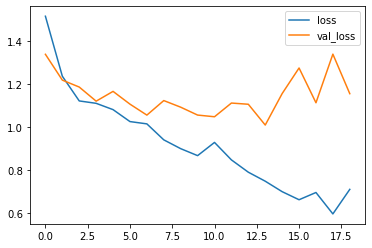

In [205]:
losses3[['loss','val_loss']].plot()

**Overfitting still a problem**

In [206]:
pred3 = model3.predict_classes(X_test)

In [207]:
print(confusion_matrix(y_test,pred3))

[[22  1 11 23  8]
 [ 2 24  2  0  7]
 [ 9  1 36  5 11]
 [ 4  0  9 35  1]
 [ 2  2  4  0 47]]


In [208]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.56      0.34      0.42        65
           1       0.86      0.69      0.76        35
           2       0.58      0.58      0.58        62
           3       0.56      0.71      0.63        49
           4       0.64      0.85      0.73        55

    accuracy                           0.62       266
   macro avg       0.64      0.63      0.62       266
weighted avg       0.62      0.62      0.60       266



## Introduce Dropout layers 

**This will also reduce overfitting**

In [278]:
model4 = Sequential()

model4.add(Conv2D(16, 3,padding='same',input_shape = (100,100,3)))
model4.add(Activation("relu"))
model4.add(MaxPooling2D())
model4.add(Dropout(0.1))

model4.add(Conv2D(32, 3,padding='same'))
model4.add(Activation("relu"))
model4.add(MaxPooling2D())
model4.add(Dropout(0.1))

model4.add(Conv2D(64, 3,padding='same'))
model4.add(Activation("relu"))
model4.add(MaxPooling2D())
model4.add(Dropout(0.1))


model4.add(Flatten())
model4.add(Dense(128))
model4.add(Dropout(0.1))

          
model4.add(Dense(num_classes,activation='softmax'))
          
model4.compile(loss= 'sparse_categorical_crossentropy',optimizer="adam",metrics=["accuracy"])

In [279]:
model4.fit_generator(it,steps_per_epoch = 54 ,epochs = 100, callbacks=[early_stop], validation_data=(X_test, y_test),class_weight=class_weights)

Epoch 1/100
54/54 [==============================] - 14s 253ms/step - loss: 2.2251 - acc: 0.2509 - val_loss: 1.4388 - val_acc: 0.4248
Epoch 2/100
54/54 [==============================] - 18s 333ms/step - loss: 1.3344 - acc: 0.4182 - val_loss: 1.1702 - val_acc: 0.4962
Epoch 3/100
54/54 [==============================] - 18s 331ms/step - loss: 1.2470 - acc: 0.4740 - val_loss: 1.1621 - val_acc: 0.5150
Epoch 4/100
54/54 [==============================] - 17s 312ms/step - loss: 1.1787 - acc: 0.5037 - val_loss: 1.1173 - val_acc: 0.4774
Epoch 5/100
54/54 [==============================] - 17s 318ms/step - loss: 1.2254 - acc: 0.4665 - val_loss: 1.2127 - val_acc: 0.4812
Epoch 6/100
54/54 [==============================] - 17s 315ms/step - loss: 1.1875 - acc: 0.5056 - val_loss: 1.2410 - val_acc: 0.4962
Epoch 7/100
54/54 [==============================] - 18s 328ms/step - loss: 1.1295 - acc: 0.5762 - val_loss: 1.0985 - val_acc: 0.5263
Epoch 8/100
54/54 [==============================] - 17s 315ms

In [280]:
losses4= pd.DataFrame(model4.history.history)

<AxesSubplot:>

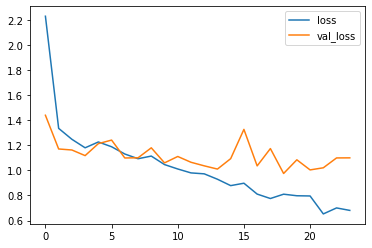

In [281]:
losses4[['loss','val_loss']].plot()

In [284]:
pred4 = model4.predict_classes(X_test)

In [285]:
print(confusion_matrix(y_test,pred4))

[[26  4  8 23  4]
 [ 0 28  3  0  0]
 [ 3 12 31  8 14]
 [ 6  0  4 38  0]
 [ 0  8  6  1 39]]


In [286]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.74      0.40      0.52        65
           1       0.54      0.90      0.67        31
           2       0.60      0.46      0.52        68
           3       0.54      0.79      0.64        48
           4       0.68      0.72      0.70        54

    accuracy                           0.61       266
   macro avg       0.62      0.65      0.61       266
weighted avg       0.63      0.61      0.60       266

